In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
### Initial imports
import logging
import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as T
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")

logging.basicConfig(level=logging.INFO)
log = logging.getLogger(__name__)

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from epimodel.pymc3_models import cm_effect
from epimodel.pymc3_models.cm_effect.datapreprocessor import DataPreprocessor

%matplotlib inline

In [22]:
dp = DataPreprocessor(drop_HS=True)
data = dp.preprocess_data("data_final.csv")

INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Dropping Healthcare Infection Control
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Smoothing
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Albania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Andorra
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Estonia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Iceland
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Latvia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Lithuania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing New Zealand
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Singapore
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Slovakia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Masking


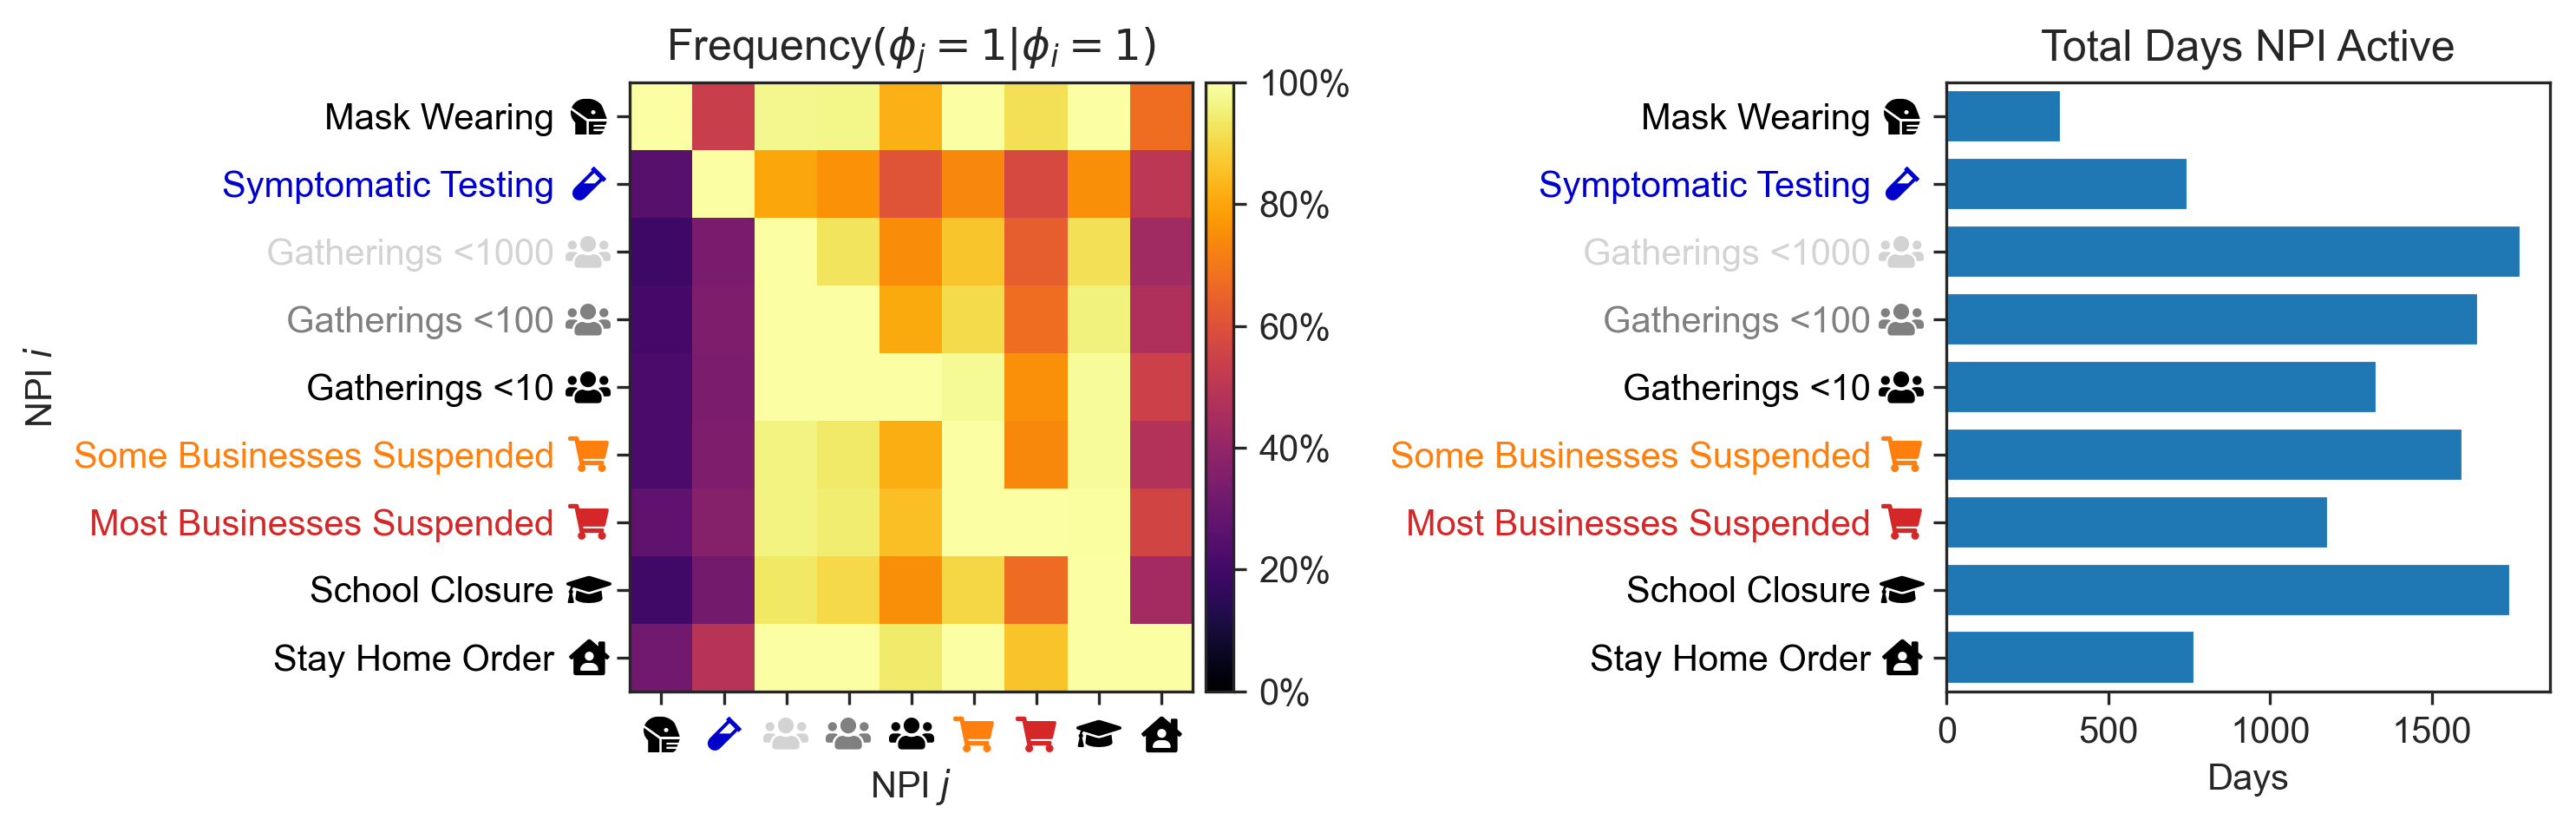

In [23]:
cm_plot_style = [
#             ("\uf7f2", "tab:red"), # hospital symbol
            ("\uf963", "black"), # mask
            ("\uf492", "mediumblue"), # vial
            ("\uf0c0", "lightgrey"), # ppl
            ("\uf0c0", "grey"), # ppl
            ("\uf0c0", "black"), # ppl
            ("\uf07a", "tab:orange"), # shop 1
            ("\uf07a", "tab:red"), # shop2 
            ("\uf19d", "black"), # school
            ("\uf965", "black") # home
        ]
data.summary_plot(cm_plot_style)

In [24]:
with cm_effect.models.CMCombined_Final(data, cm_plot_style) as model:
    model.build_model()

hyper


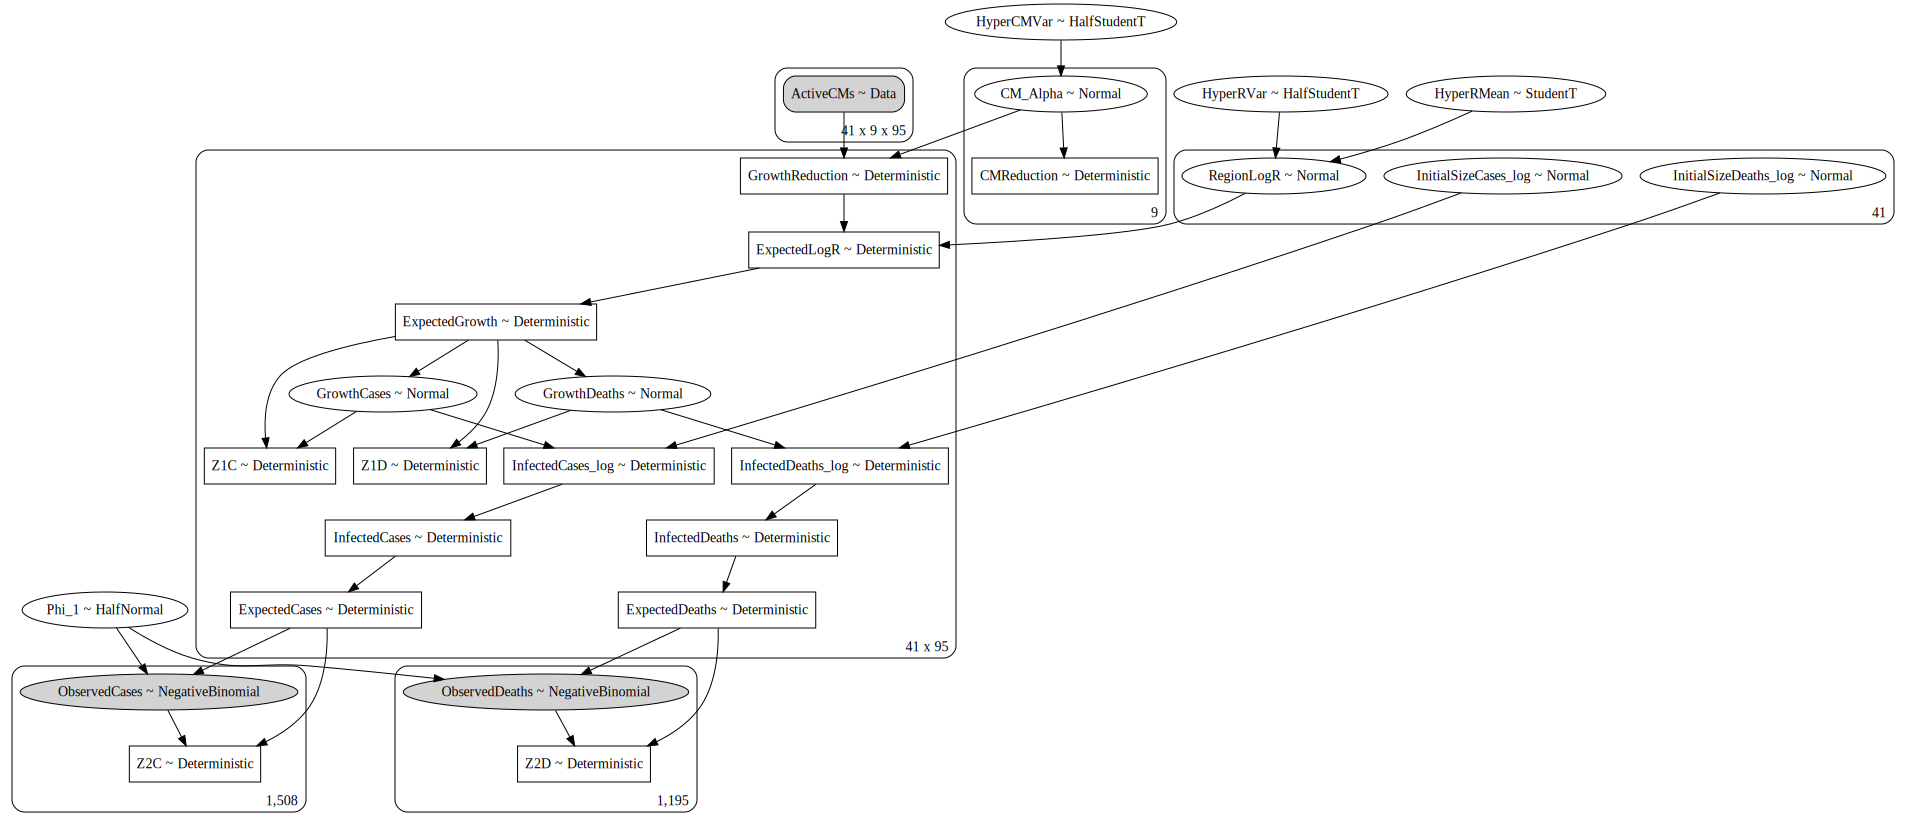

In [25]:
pm.model_to_graphviz(model).render("model-combined-final")
pm.model_to_graphviz(model)

In [ ]:
with model.model:
    model.trace = pm.sample(2000, chains=4, cores=8, target_accept=0.95)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 8 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 8 jobs)
NUTS: [InitialSizeDeaths_log, Phi_1, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR, HyperRVar, HyperRMean, CM_Alpha, HyperCMVar]
INFO:pymc3:NUTS: [InitialSizeDeaths_log, Phi_1, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR, HyperRVar, HyperRMean, CM_Alpha, HyperCMVar]
Sampling 4 chains, 0 divergences:  20%|██        | 2036/10000 [30:01<2:31:12,  1.14s/draws]

INFO:epimodel.pymc3_models.cm_effect.models:Saving Plot at /Users/mrinank/workspace/epidemicforecasting/epimodel/notebooks/final_data/out at 23-05;19-25


200.0


INFO:epimodel.pymc3_models.cm_effect.models:Saving Plot at /Users/mrinank/workspace/epidemicforecasting/epimodel/notebooks/final_data/out at 23-05;19-25


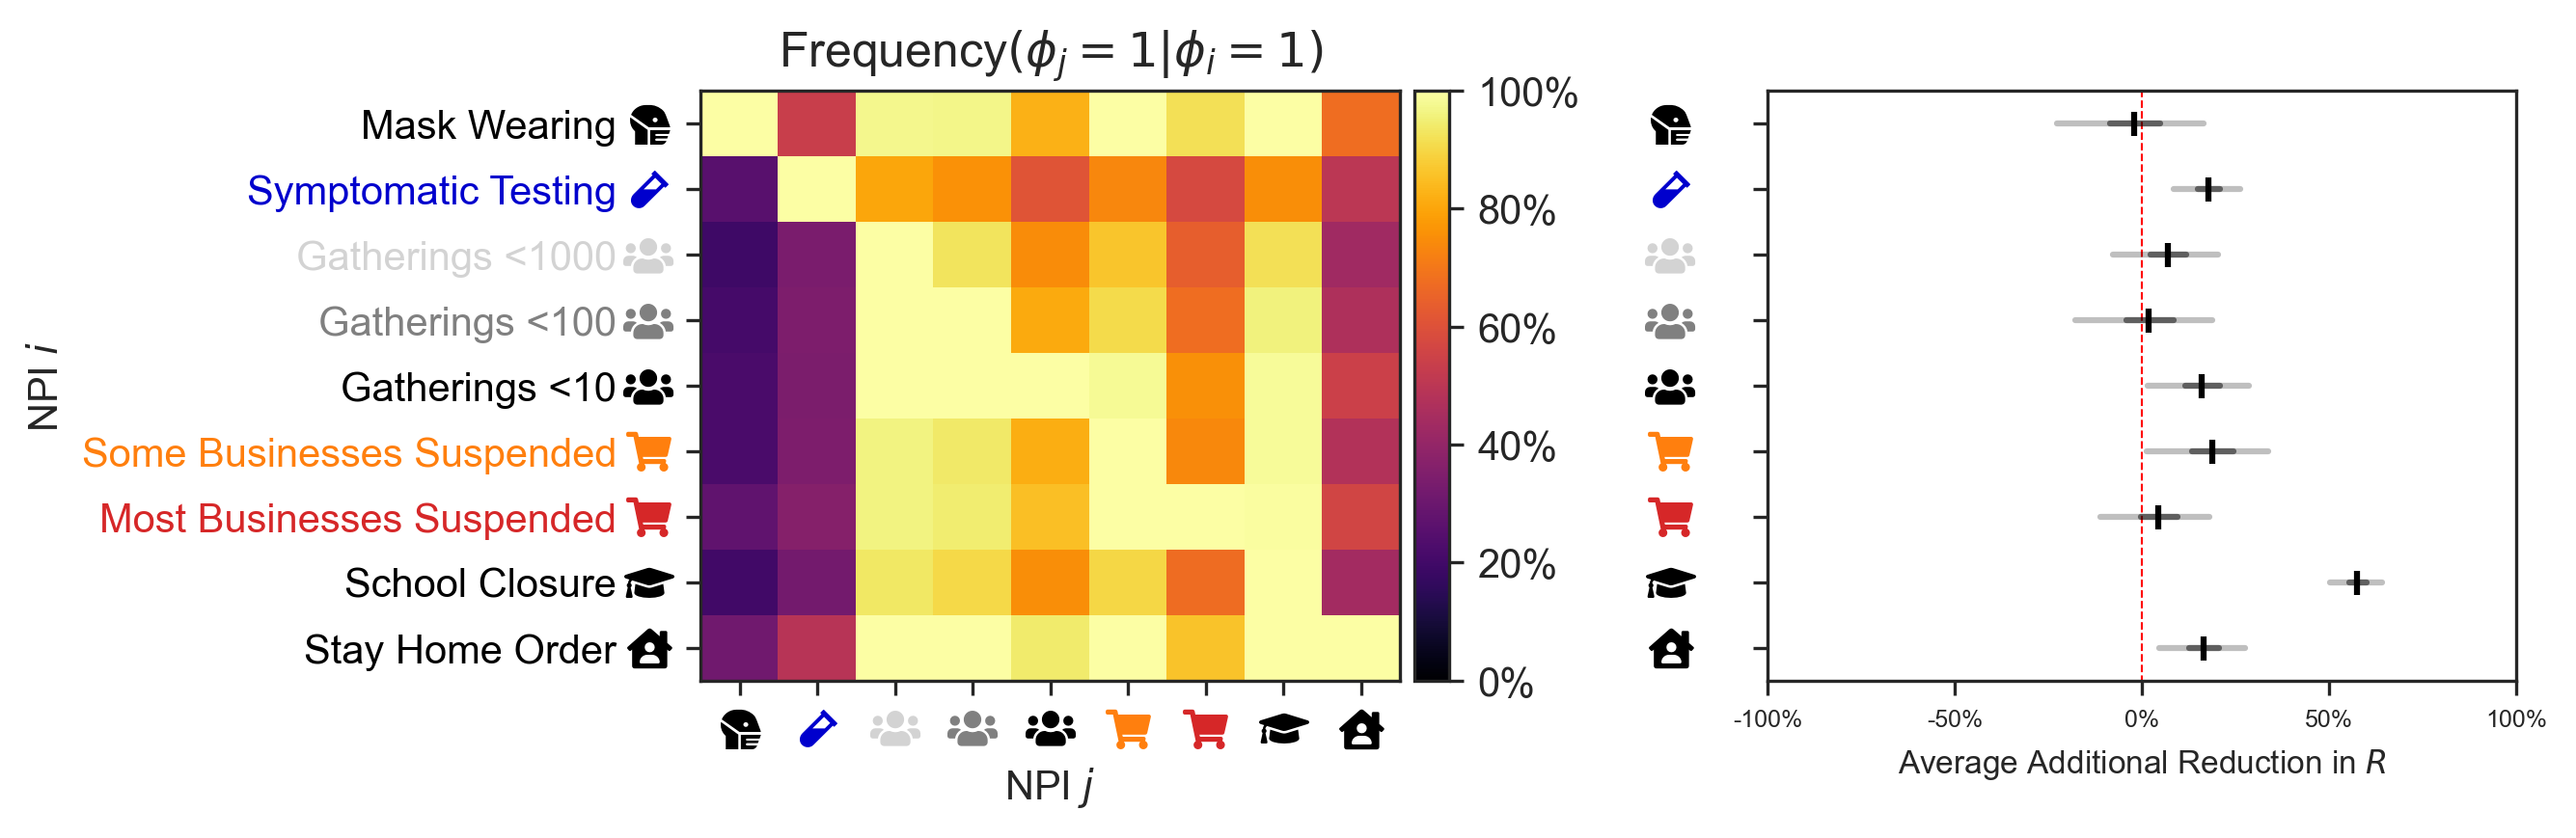

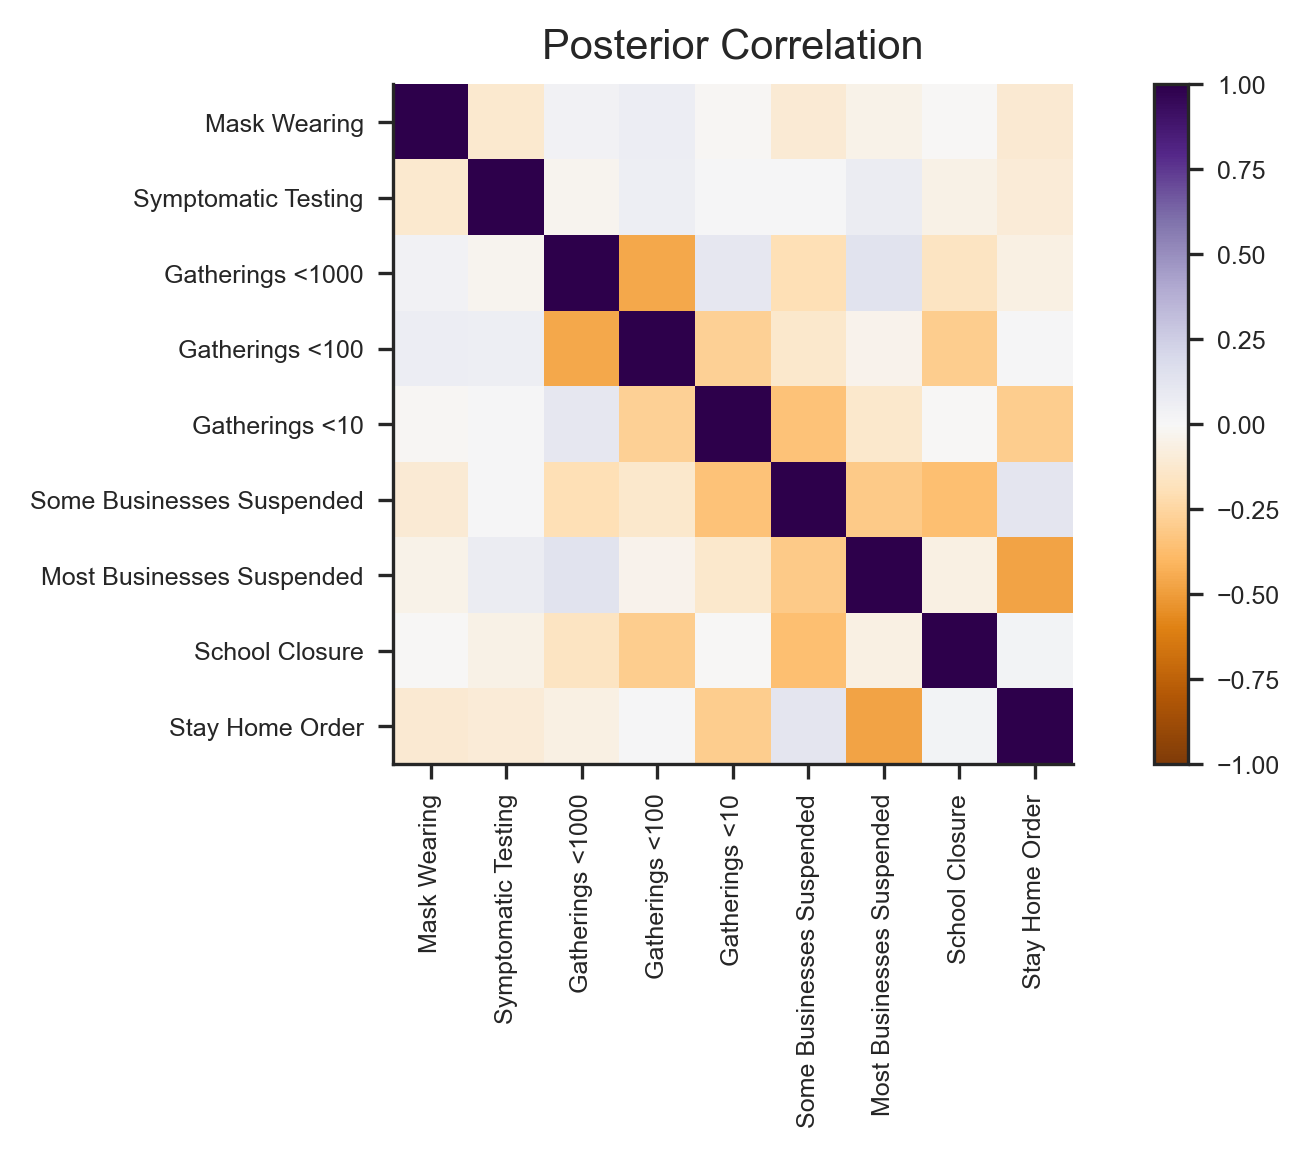

In [14]:
model.plot_effect()

INFO:epimodel.pymc3_models.cm_effect.models:Saving Plot at /Users/mrinank/workspace/epidemicforecasting/epimodel/notebooks/final_data/out at 24-05;15-48
INFO:epimodel.pymc3_models.cm_effect.models:Saving Plot at /Users/mrinank/workspace/epidemicforecasting/epimodel/notebooks/final_data/out at 24-05;15-48


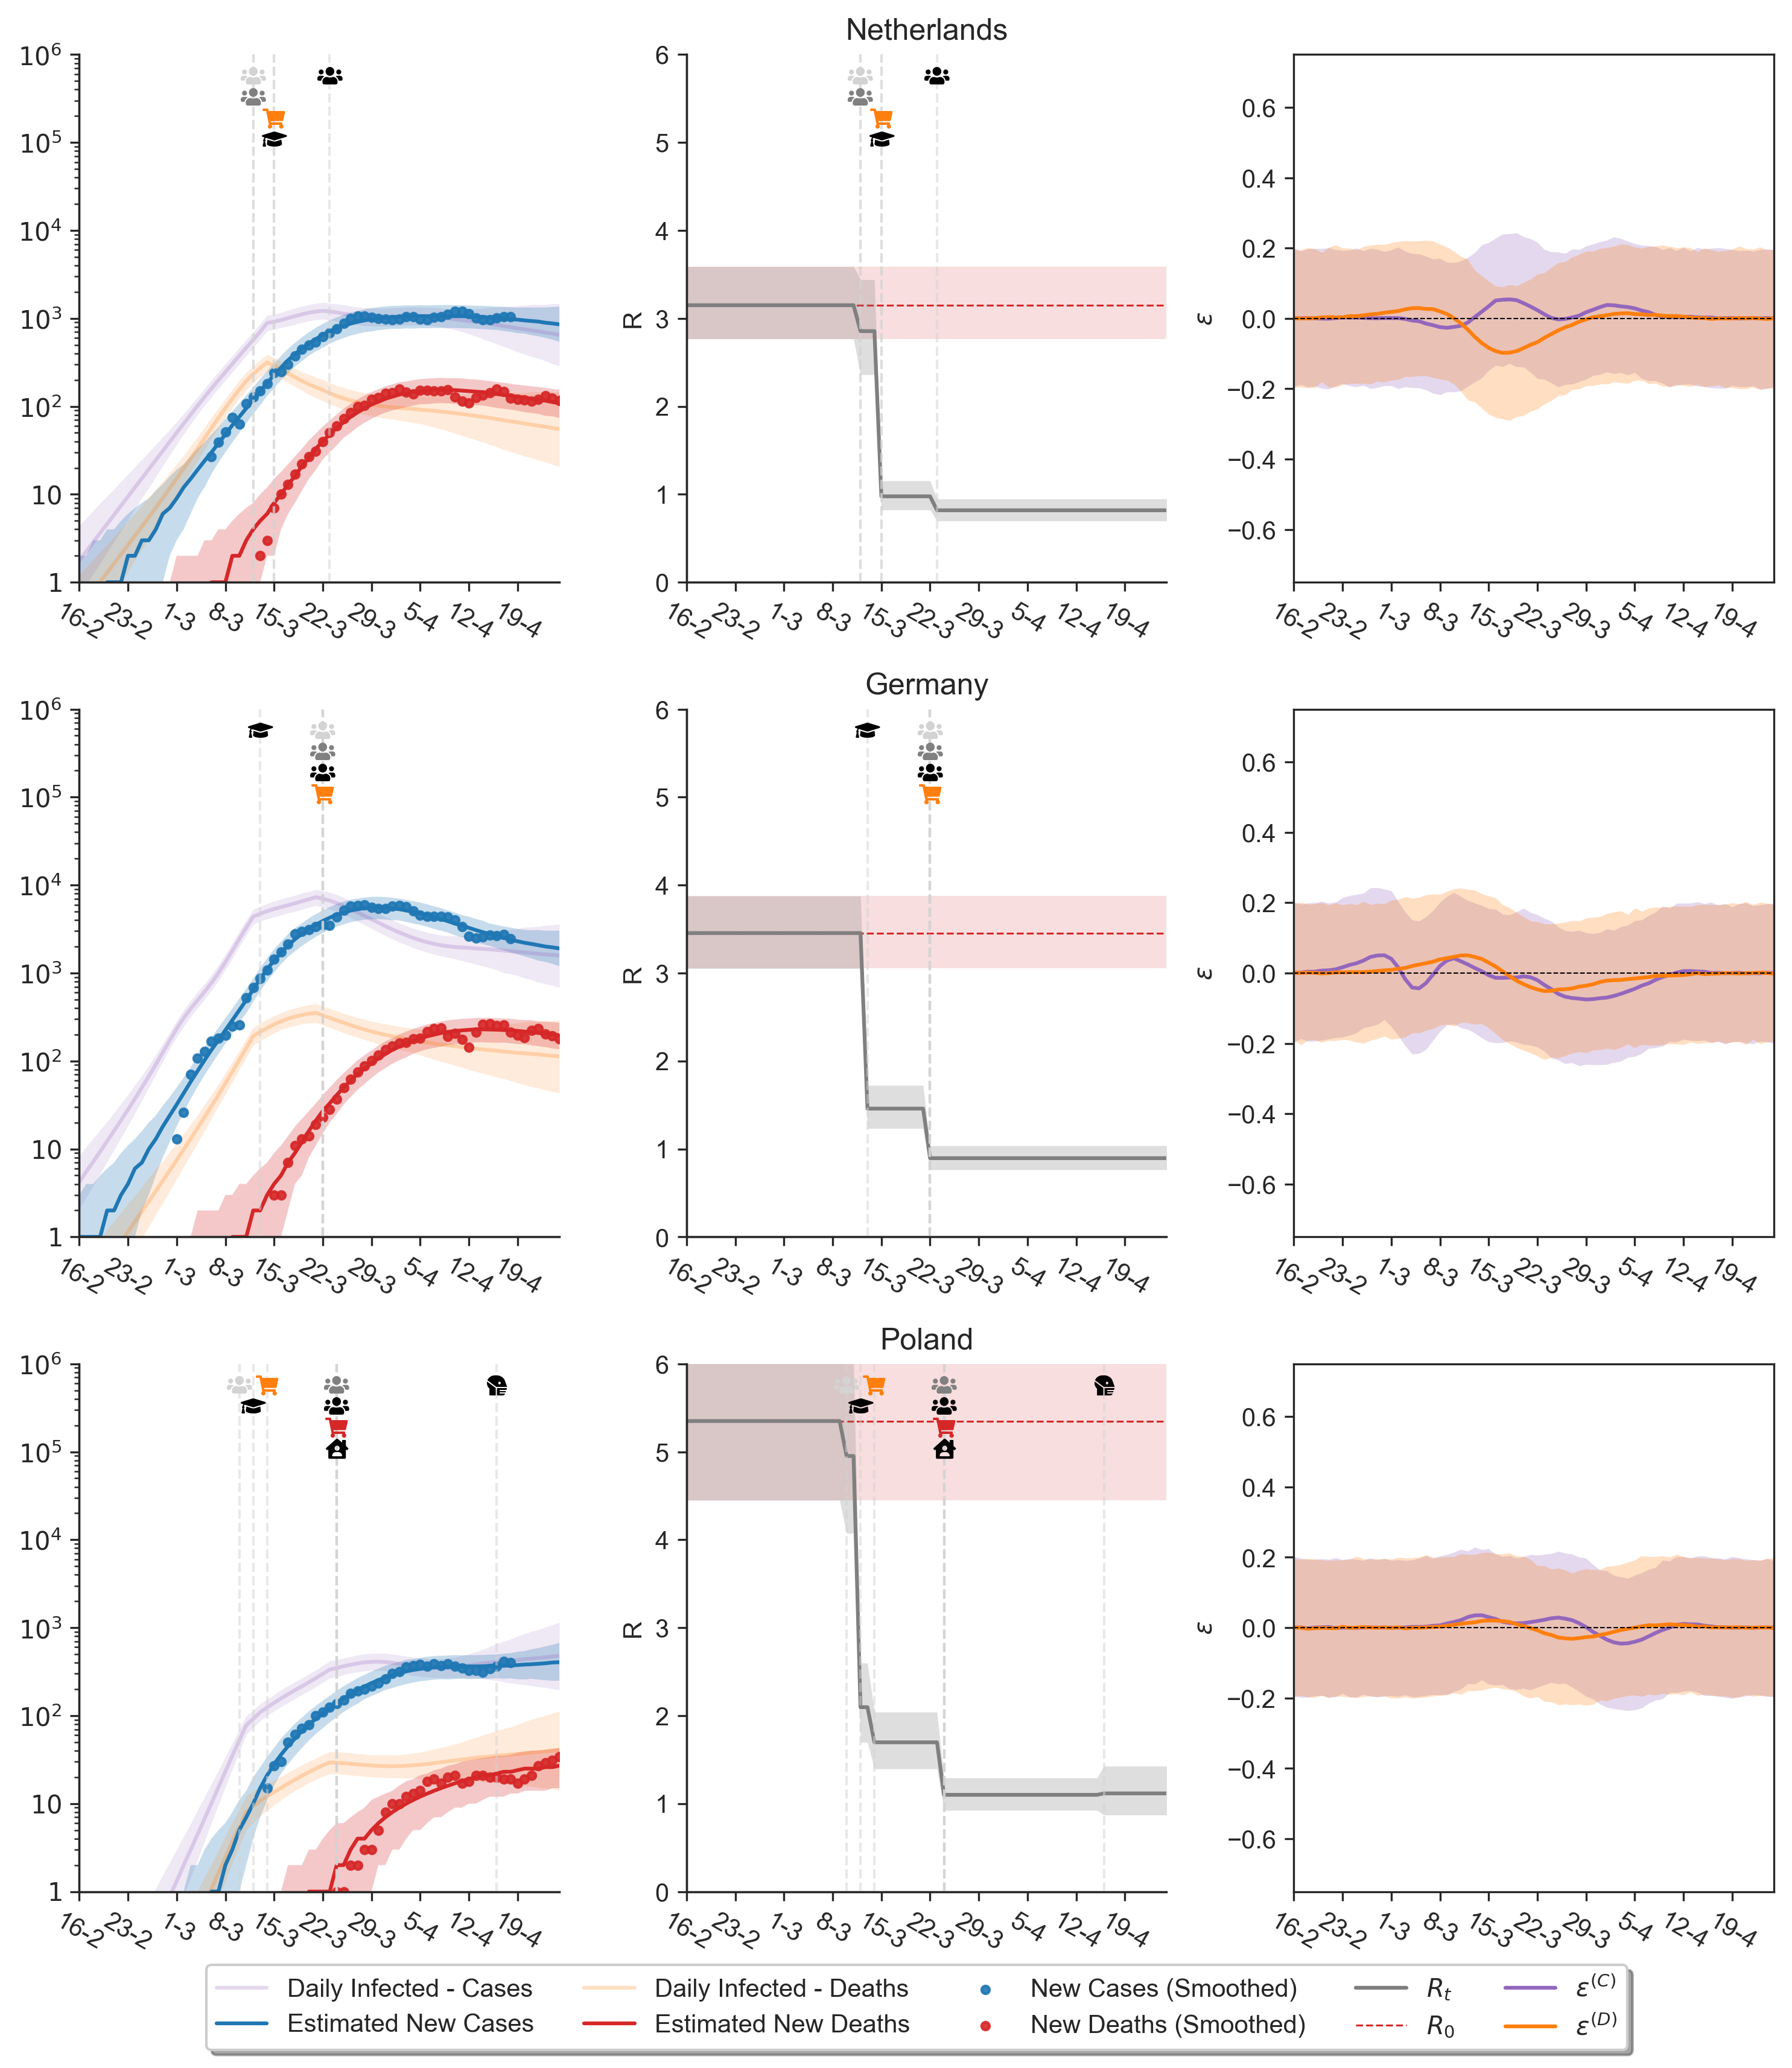

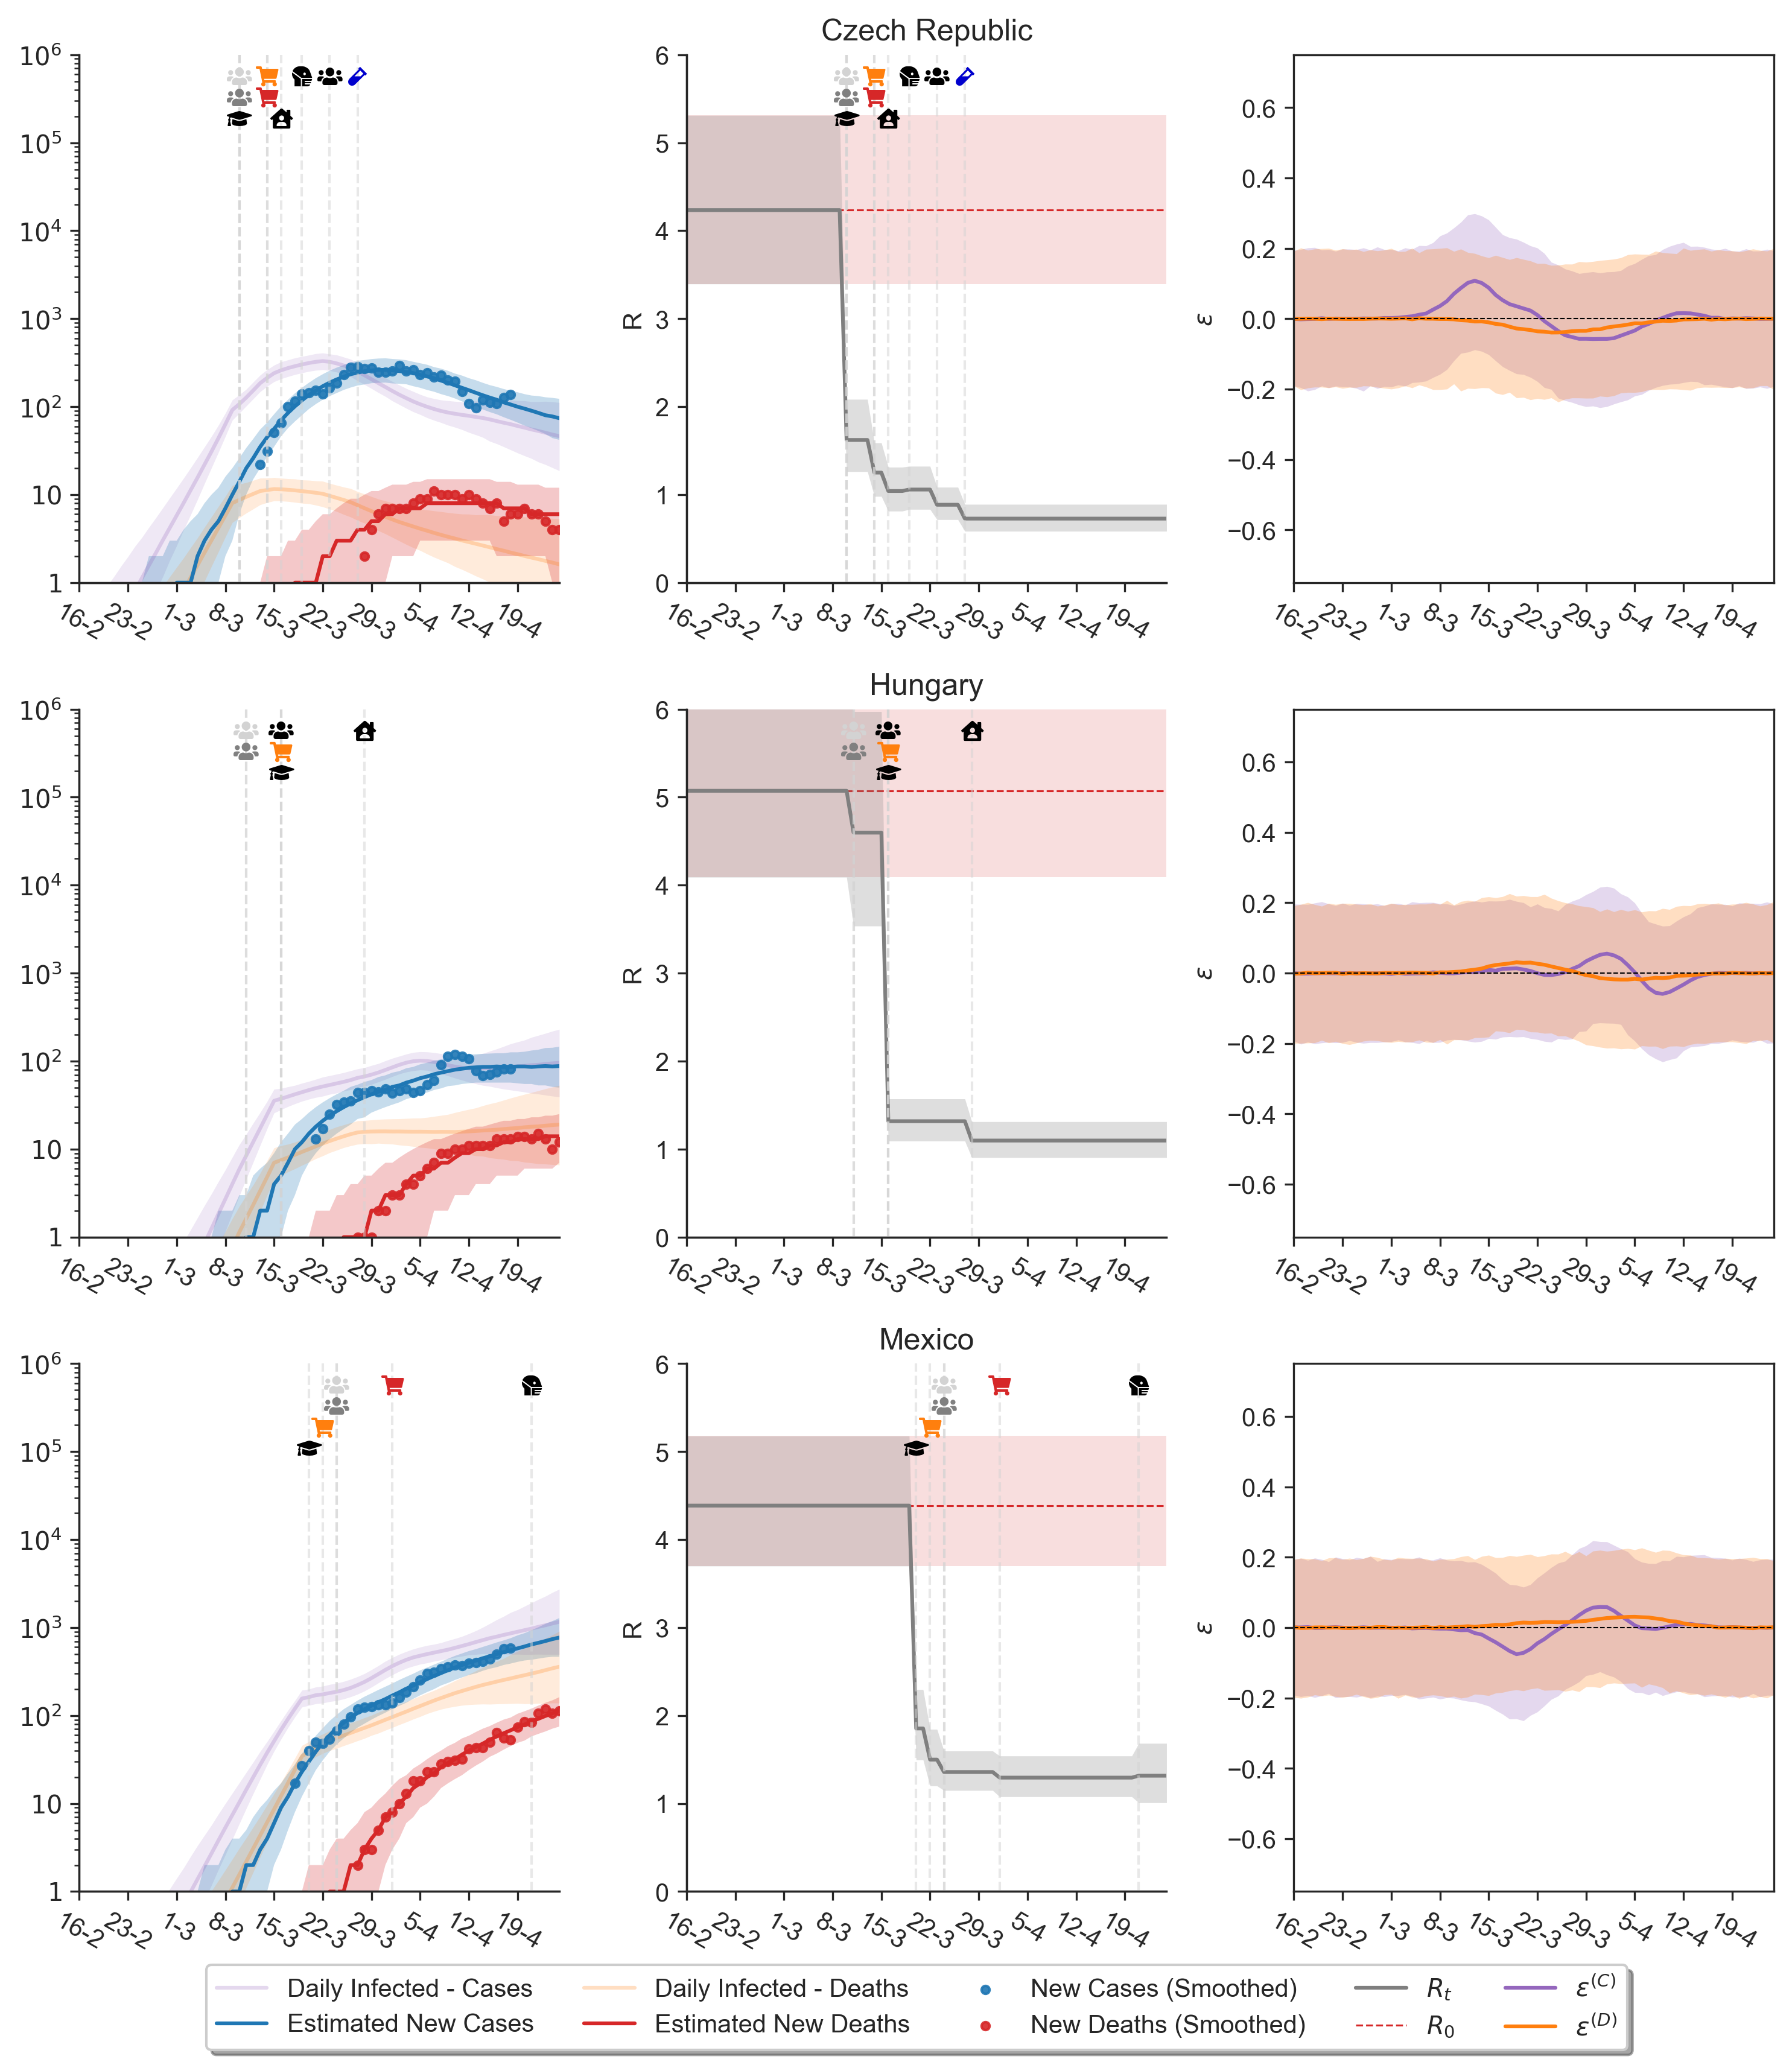

In [36]:
regions = ["NL", "DE", "PL", "CZ", "HU", "MX"]
r_i = [data.Rs.index(r) for r in regions]
model.plot_subset_region_predictions(r_i, model.cm_plot_style)

In [6]:
with cm_effect.models.CMCombined_Final(data, None) as model2:
    model2.DailyGrowthNoise = 0.15
    model2.build_model()

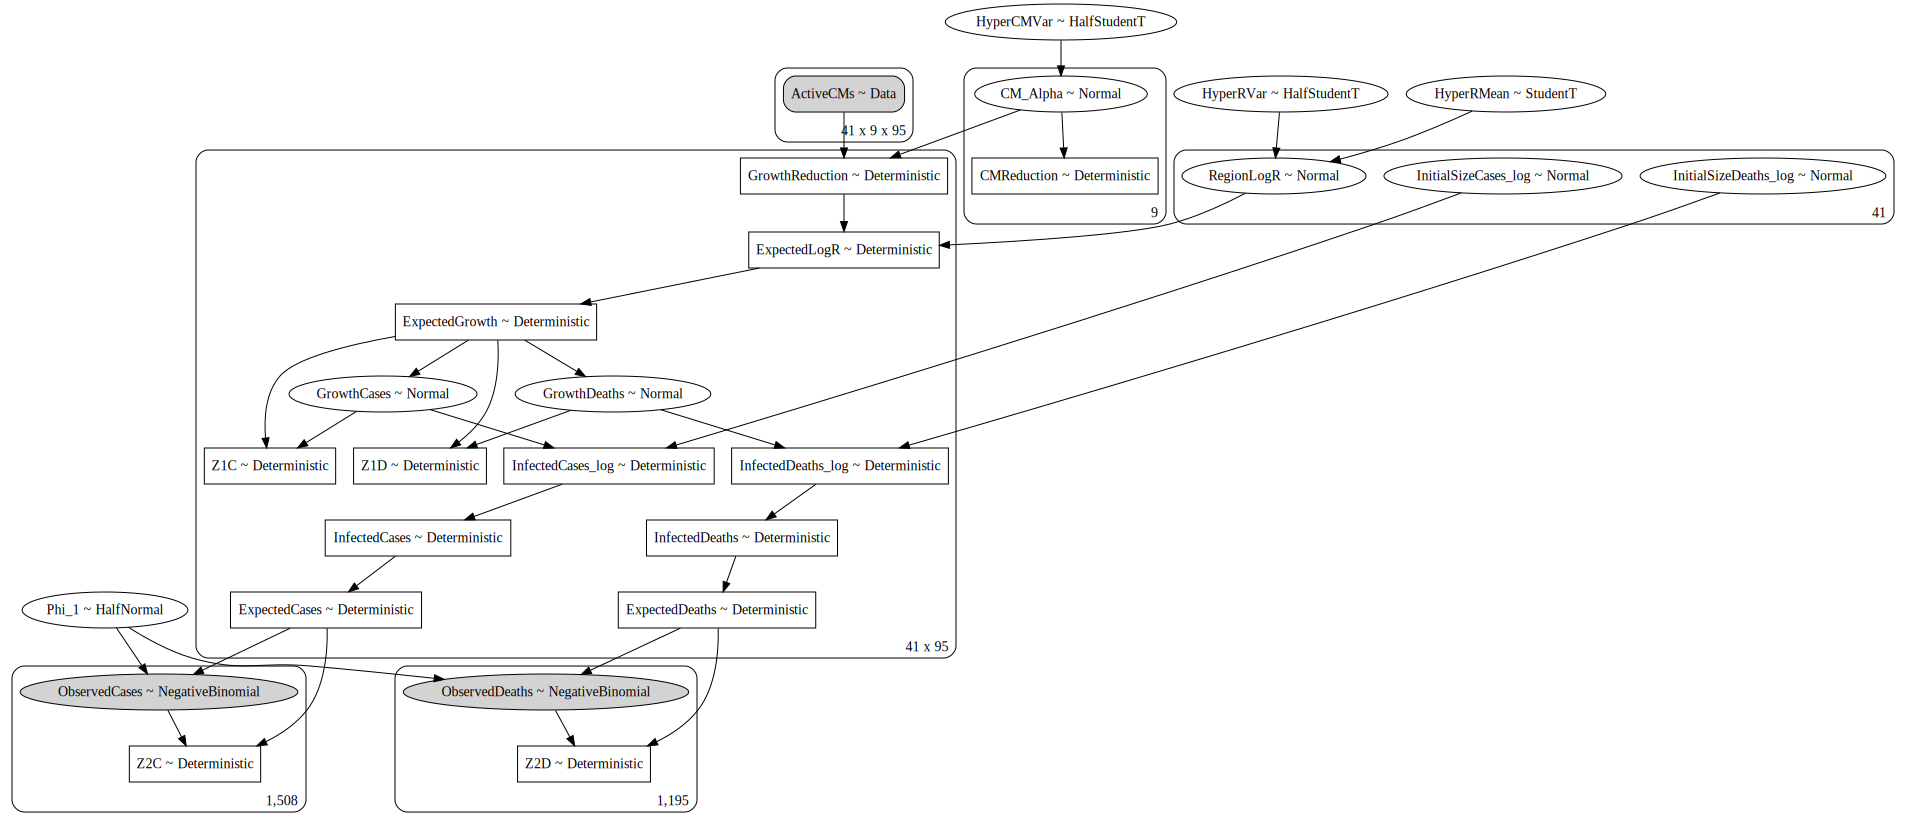

In [7]:
pm.model_to_graphviz(model2).render("model-combined-final")
pm.model_to_graphviz(model2)

In [8]:
with model2.model:
    model2.trace = pm.sample(1000, chains=2, target_accept=0.95)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 4 jobs)
NUTS: [InitialSizeDeaths_log, Phi_1, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR, HyperRVar, HyperRMean, CM_Alpha, HyperCMVar]
INFO:pymc3:NUTS: [InitialSizeDeaths_log, Phi_1, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR, HyperRVar, HyperRMean, CM_Alpha, HyperCMVar]
Sampling 2 chains, 0 divergences: 100%|██████████| 3000/3000 [1:09:17<00:00,  1.39s/draws]
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


200.0


INFO:epimodel.pymc3_models.cm_effect.models:Saving Plot at /Users/mrinank/workspace/epidemicforecasting/epimodel/notebooks/final_data/out at 25-05;14-40
INFO:epimodel.pymc3_models.cm_effect.models:Saving Plot at /Users/mrinank/workspace/epidemicforecasting/epimodel/notebooks/final_data/out at 25-05;14-40


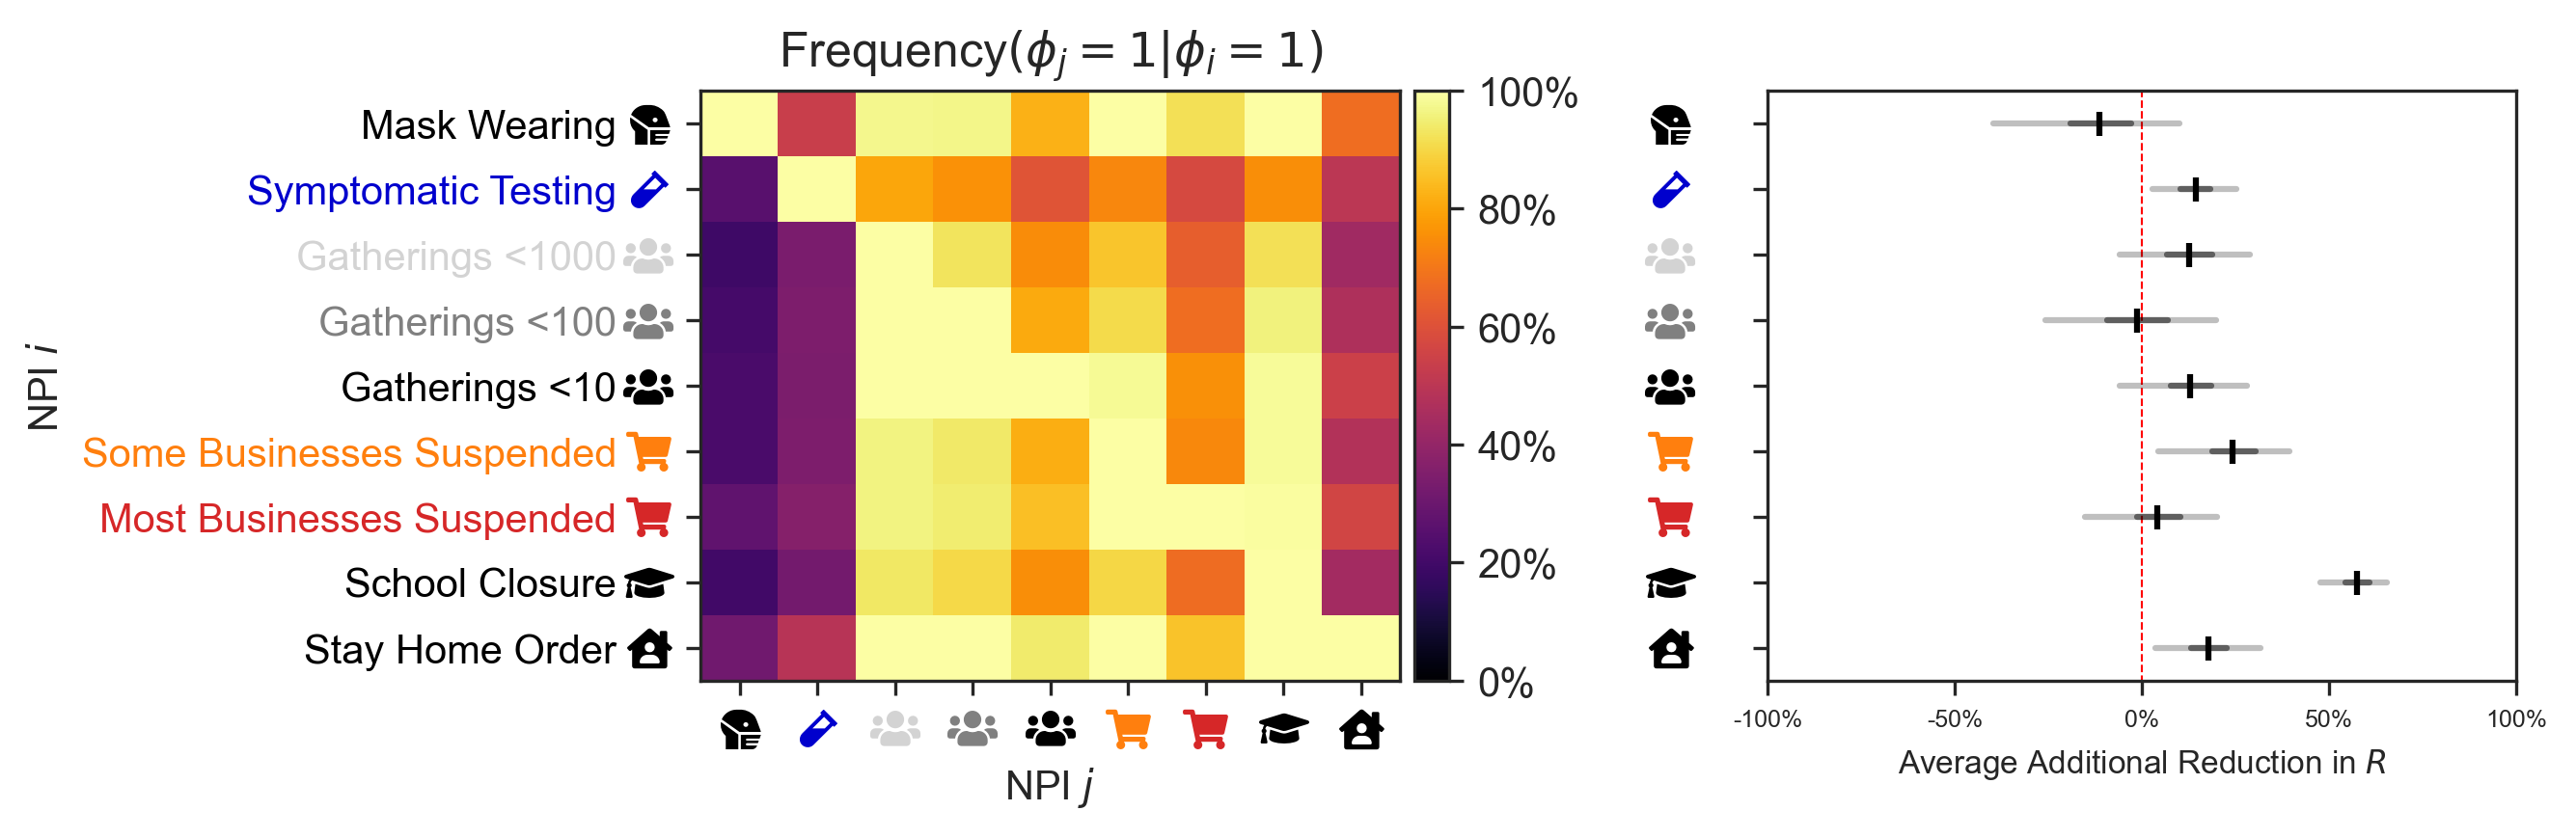

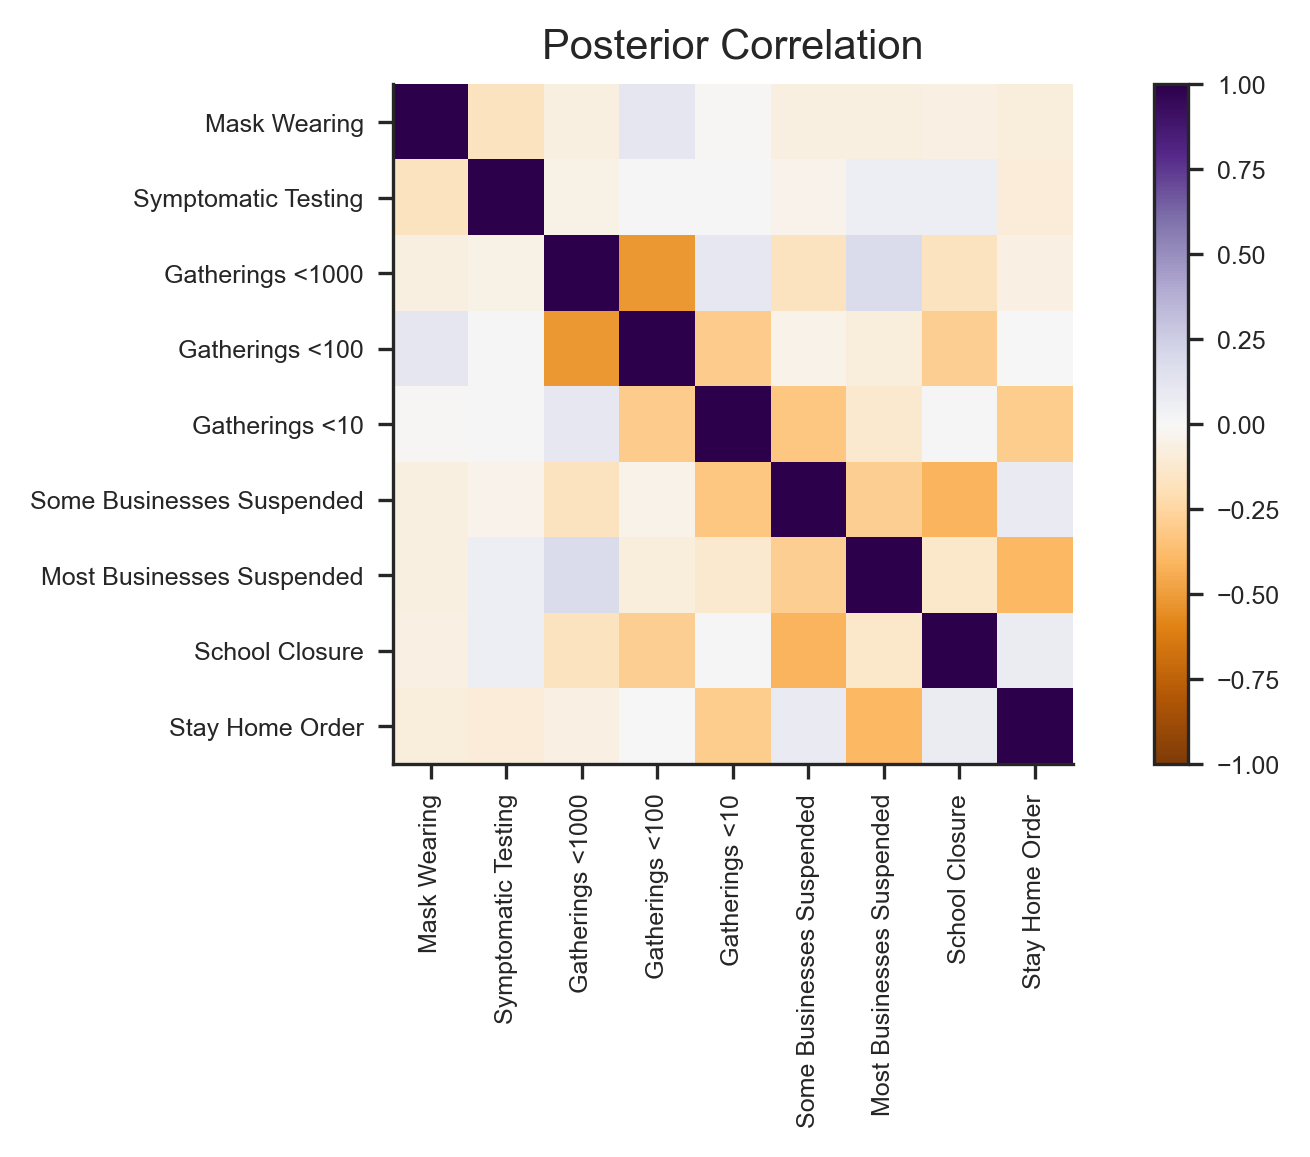

In [9]:
model2.plot_effect()

In [11]:
np.mean(model2.trace.Phi_1)

57.489995927227966

In [15]:
np.savetxt("combined2305.txt", model.trace["CMReduction"])

In [ ]:
vs = model.trace.varnames

In [ ]:
vs

In [ ]:
for j in ["CMReduction", "RegionLogR", "Z1C", "Z1D", "InfectedCases", "ExpectedCases", "InfectedDeaths", "ExpectedDeaths", "Phi_1"]:
    if j in vs:
        vs.remove(j)

for j in vs:
    model.trace.remove_values(j)

In [ ]:
model.trace

In [ ]:
model.trace.varnames

In [ ]:
model.plot_subset_region_predictions([2, 11, 19, 37, 40], cm_plot_style)

In [ ]:
pickle.dump(model.trace, open("combined_final2205.pkl", "wb"))

In [ ]:
model.plot_region_predictions(model.cm_plot_style)

In [ ]:
import pickle
pickle.dump(model.trace, open("combined_2205.pkl", "wb"))

In [ ]:
dp = DataPreprocessor(min_confirmed=250)
data = dp.preprocess_data("data_final.csv")

with cm_effect.models.CMCombined_Final(data, cm_plot_style) as model:
    model.build_model()

with model.model:
    model.trace = pm.sample(2000, chains=4, cores=8)

In [ ]:
np.mean(model.trace.Phi_1)

In [ ]:
model.plot_effect()

In [ ]:
np.mean(model.trace.Phi_1)

In [ ]:
model.plot_region_predictions(cm_plot_style)

In [ ]:
cm_plot_style = [
            ("\uf7f2", "tab:red"), # hospital symbol
            ("\uf963", "black"), # mask
            ("\uf492", "mediumblue"), # vial
            ("\uf0c0", "lightgrey"), # ppl
            ("\uf0c0", "grey"), # ppl
            ("\uf0c0", "black"), # ppl
            ("\uf07a", "tab:orange"), # shop 1
            ("\uf07a", "tab:red"), # shop2 
            ("\uf19d", "black"), # school
            ("\uf965", "black") # home
        ]
model.plot_subset_region_predictions([2, 11, 19, 37, 40], cm_plot_style)

In [ ]:
np.mean(model.trace.Phi_1)

In [ ]:
model.plot_effect()

In [ ]:
days_plot = [-1, -3, -7]
days_in_future = [10, 7, 3]

plt.figure(figsize=(9, 3), dpi=300)
for d_indx, d in enumerate(days_plot):
    plt.subplot(1, 3, d_indx+1)
    plt.yscale("log")
    plt.xscale("log")
    plt.plot([10**-1, 10**7], [10**-1, 10**8], "--", linewidth=0.5, color="black")
    for indx, region in enumerate(data.Rs):
        ed = model.trace.ExpectedDeaths[:, indx, d]
        ec = model.trace.ExpectedCases[:, indx, d]
        dist1 = pm.NegativeBinomial.dist(mu=ed , alpha= 30)
        dist2 = pm.NegativeBinomial.dist(mu=ec , alpha= 30)
        ec_output = dist2.random()
        try:
            ed_output = dist1.random()
        except:
            print(np.sum(ed))
            print(f"error with {region}")
            print(model.d.NewDeaths.data[indx, d])
            ed_output = 1e-10
        
        deaths = model.d.NewDeaths.data[indx, d]
        cases = model.d.NewCases.data[indx, d]
        if indx == 0:
            plt.scatter(cases, np.mean(ec_output), color="tab:blue", label="Cases", s=8)    
            plt.scatter(deaths, np.mean(ed_output), color="tab:red", label="Deaths", s=8)

        plt.scatter(cases, np.mean(ec_output), color="tab:blue", s=8)
        plt.scatter(deaths, np.mean(ed_output), color="tab:red", s=8)
        plt.plot([cases, cases], [np.percentile(ec_output, 2.5), np.percentile(ec_output, 97.5)], color="tab:blue", alpha=0.25)
        plt.plot([deaths, deaths], [np.percentile(ed_output, 2.5), np.percentile(ed_output, 97.5)], color="tab:red", alpha=0.25)
        
    plt.xlabel("Actual Cases/Deaths")
    plt.ylabel("Predicted Cases/Deaths")
    plt.title(f"{days_in_future[d_indx]} day lookahead")
    plt.xlim([10**-1, 10**4.5])
    plt.ylim([10**-1, 10**4.5])
plt.legend()
plt.tight_layout()

In [ ]:
start = model.trace.point(-1)

In [ ]:
model.plot_effect()

In [ ]:
dp = DataPreprocessor()
data = dp.preprocess_data("data_final.csv")

In [ ]:
with cm_effect.models.CMCombined_Final(data) as model2:
    model2.build_model()

In [ ]:
np.savetxt("comb1005.txt", model.trace["CMReduction"])

In [ ]:
model.plot_effect()

In [ ]:
cm_plot_style = [
            ("\uf7f2", "tab:red"), # hospital symbol
            ("\uf963", "black"), # mask
            ("\uf492", "mediumblue"), # vial
            ("\uf0c0", "lightgrey"), # ppl
            ("\uf0c0", "grey"), # ppl
            ("\uf0c0", "black"), # ppl
            ("\uf07a", "tab:orange"), # shop 1
            ("\uf07a", "tab:red"), # shop2 
            ("\uf19d", "black"), # school
            ("\uf965", "black") # home
        ]
model.plot_subset_region_predictions([2, 11, 19, 37, 40], cm_plot_style)

In [ ]:
model.d.Rs.index("AT")

In [ ]:
cm_plot_style = [
            ("\uf7f2", "tab:red"), # hospital symbol
            ("\uf963", "black"), # mask
            ("\uf492", "mediumblue"), # vial
            ("\uf0c0", "lightgrey"), # ppl
            ("\uf0c0", "grey"), # ppl
            ("\uf0c0", "black"), # ppl
            ("\uf07a", "tab:orange"), # shop 1
            ("\uf07a", "tab:red"), # shop2 
            ("\uf19d", "black"), # school
            ("\uf965", "black") # home
        ]
model.plot_region_predictions(cm_plot_style)

In [ ]:
with cm_effect.models.CMCombined_Final(data) as model2:
    model2.build_model()

In [ ]:
with model2.model:
    model2.trace = pm.sample(2000, chains=2, target_accept=0.95)

In [ ]:
model2.plot_effect()

In [ ]:
np.mean(model2.trace.Phi_1)

In [ ]:
np.mean(model.trace.Phi)

In [ ]:
cm_plot_style = [
            ("\uf7f2", "tab:red"), # hospital symbol
            ("\uf963", "black"), # mask
            ("\uf492", "mediumblue"), # vial
            ("\uf0c0", "lightgrey"), # ppl
            ("\uf0c0", "grey"), # ppl
            ("\uf0c0", "black"), # ppl
            ("\uf07a", "tab:orange"), # shop 1
            ("\uf07a", "tab:red"), # shop2 
            ("\uf19d", "black"), # school
            ("\uf965", "black") # home
        ]

model.plot_region_predictions(cm_plot_style)

In [ ]:
for i, cm in enumerate(model.d.CMs):
    print(f"CM: {cm} mean: {np.mean(model.trace['CMReduction'][:, i]):.3f} [{np.percentile(model.trace['CMReduction'][:, i], 2.5):.3f}, {np.percentile(model.trace['CMReduction'][:, i], 97.5):.3f}]")